 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [21]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [111]:
# Reading whale returns

whale_returns = Path("whale_returns.csv")
whale_returns = pd.read_csv(whale_returns, index_col="Date")
whale_returns.index = pd.to_datetime(whale_returns.index)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [112]:
# Count nulls

whale_returns.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [113]:
# Drop nulls

whale_returns = whale_returns.dropna()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [114]:
# Reading algorithmic returns
algo_returns = Path("algo_returns.csv")
algo_returns = pd.read_csv(algo_returns, index_col="Date")
algo_returns.index = pd.to_datetime(algo_returns.index)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [115]:
# Count nulls

algo_returns.isnull().mean() * 100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [116]:
# Drop nulls

algo_returns = algo_returns.dropna()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [117]:
# Reading S&P 500 Closing Prices

sp500_history = Path("sp500_history.csv")
sp500_history = pd.read_csv(sp500_history, index_col="Date")
sp500_history.index = pd.to_datetime(sp500_history.index)
sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [118]:
# Check Data Types

sp500_history.dtypes

Close    object
dtype: object

In [119]:
# Fix Data Types

sp500_history["Close"]=sp500_history["Close"].str.replace('$', '').astype("float64")
sp500_history.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [120]:
# Calculate Daily Returns

sp500_history = sp500_history.pct_change()
sp500_history.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [121]:
# Count nulls

sp500_history.isnull().mean() * 100

Close    0.060643
dtype: float64

In [122]:
# Drop nulls

sp500_history.dropna()
sp500_history.isnull().sum()

Close    1
dtype: int64

In [123]:
# Rename `Close` Column to be specific to this portfolio.

columns = ["S&P 500 Close"]
sp500_history.columns = columns
sp500_history.head()

,S&P 500 Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


## Combine Whale, Algorithmic, and S&P 500 Returns

In [124]:
# Join, Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

combined_df = pd.concat([whale_returns, algo_returns, sp500_history], axis="columns", join="inner")
combined_df = combined_df.sort_index(ascending=True)
combined_df=combined_df.dropna()
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

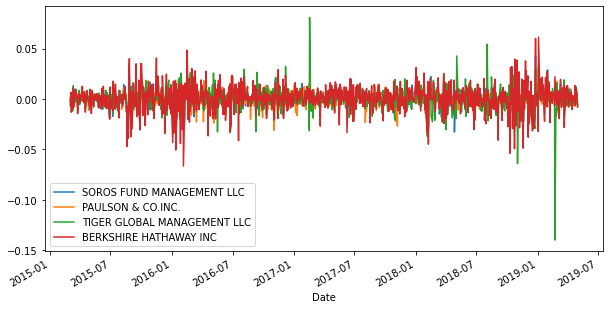

In [125]:
# Plot daily returns of all portfolios

whale_returns.plot(figsize = (10,5))

#### Calculate and Plot cumulative returns.

In [126]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + whale_returns).cumprod()
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431
2015-03-04,1.000962,0.998245,0.996972,0.997617
2015-03-05,1.004981,1.002314,0.999319,1.004327
2015-03-06,0.997037,0.998731,0.990844,0.991172
2015-03-09,0.997617,1.002951,0.996633,0.989534


<AxesSubplot:xlabel='Date'>

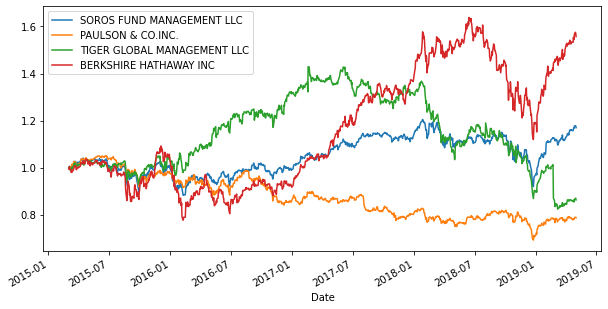

In [127]:
# Plot cumulative returns of all portfolios 

cumulative_returns.plot(figsize = (10,5))

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


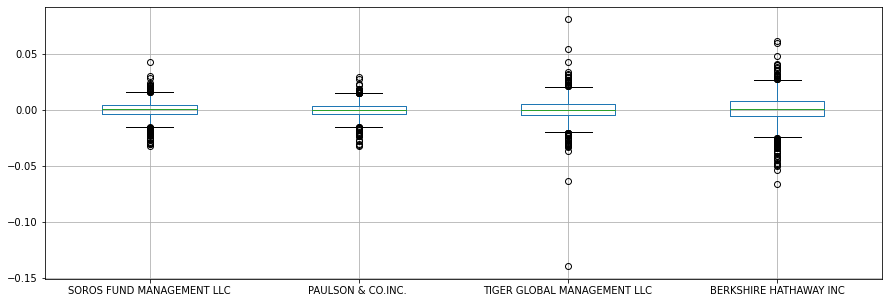

In [128]:
# Box plot to visually show risk

boxplot = whale_returns.boxplot(figsize = (15,5))

### Calculate Standard Deviations

In [129]:
# Calculate the daily standard deviations of all portfolios

volatility_portfolios = whale_returns.std()
volatility_portfolios 

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [130]:
# Calculate  the daily standard deviation of S&P 500

volatility_SP500 = sp500_history.std()
volatility_SP500

sp500_history.dtypes
 
# Determine which portfolios are riskier than the S&P 500

combined_volatility = pd.concat([volatility_SP500, volatility_portfolios])
combined_volatility.sort_values(inplace=True)
combined_volatility

for idx, value in combined_volatility.iteritems():
    if value > combined_volatility["S&P 500 Close"]:
        print(f'{idx} is riskier than the S&P 500') 

TIGER GLOBAL MANAGEMENT LLC is riskier than the S&P 500
BERKSHIRE HATHAWAY INC is riskier than the S&P 500


### Calculate the Annualized Standard Deviation

In [131]:
# Calculate the annualized standard deviation (252 trading days)

annual_volatility = whale_returns.std() * np.sqrt(252)
annual_volatility

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

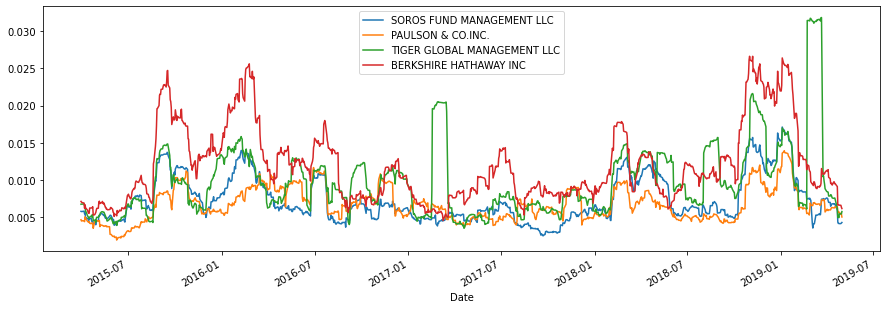

In [132]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

portfolios_rolling = whale_returns.rolling(window=21).std()
portfolios_rolling

# Plot the rolling standard deviation

portfolios_rolling = whale_returns.rolling(window=21).std().plot(figsize = (15,5))

### Calculate and plot the correlation

<AxesSubplot:>

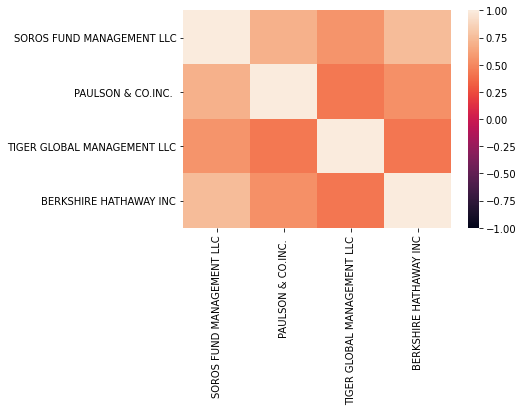

In [133]:
# Calculate the correlation

correlation = whale_returns.corr()
correlation

# Display de correlation matrix

sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.213991
2019-04-16    0.150997
2019-04-17    0.144171
2019-04-18    0.144017
2019-04-22    0.185516
Length: 1042, dtype: float64


<AxesSubplot:title={'center':'Berkshire Hathaway Beta'}, xlabel='Date'>

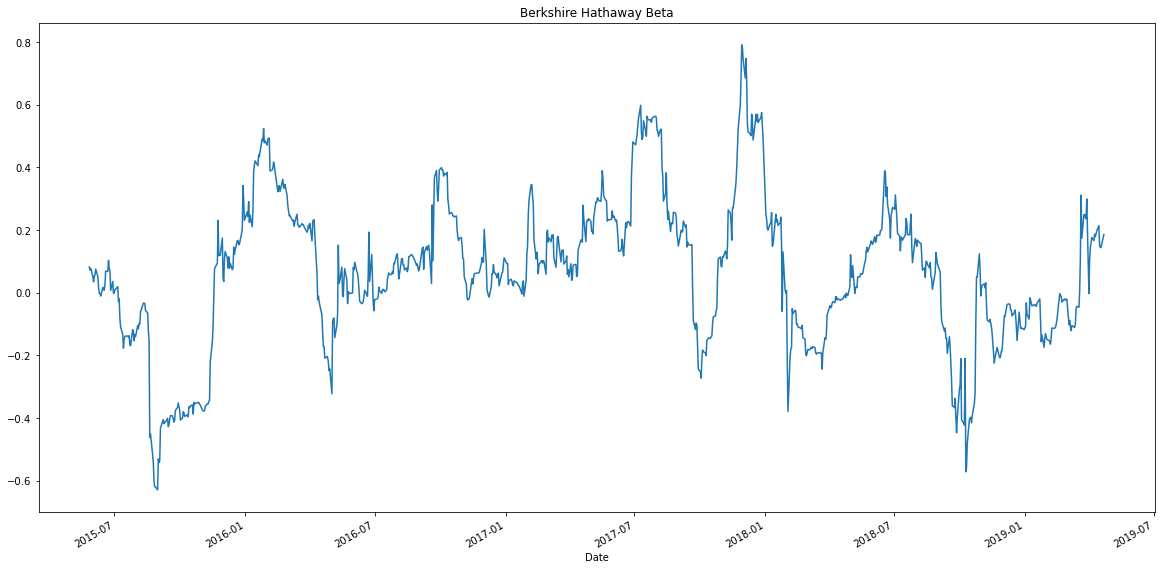

In [134]:
# Calculate covariance of a single portfolio

covariance = combined_df['BERKSHIRE HATHAWAY INC'].cov(combined_df['S&P 500 Close'])
rolling_covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df['S&P 500 Close'])

# Calculate variance of S&P 500

variance = combined_df['S&P 500 Close'].var()
rolling_variance = combined_df['S&P 500 Close'].rolling(window=60).var()

# Computing beta

rolling_beta = rolling_covariance / rolling_variance
print(rolling_beta)

# Plot beta trend

rolling_beta.plot(figsize=(20, 10), title='Berkshire Hathaway Beta')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [135]:
# Use `ewm` to calculate the rolling window

portfolios_rolling2 = whale_returns.ewm(halflife = 21)
portfolios_rolling2

ExponentialMovingWindow [com=29.799346392775035,min_periods=1,adjust=True,ignore_na=False,axis=0]

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [136]:
# Annualized Sharpe Ratios

sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500 Close                 -0.518582
dtype: float64

<AxesSubplot:>

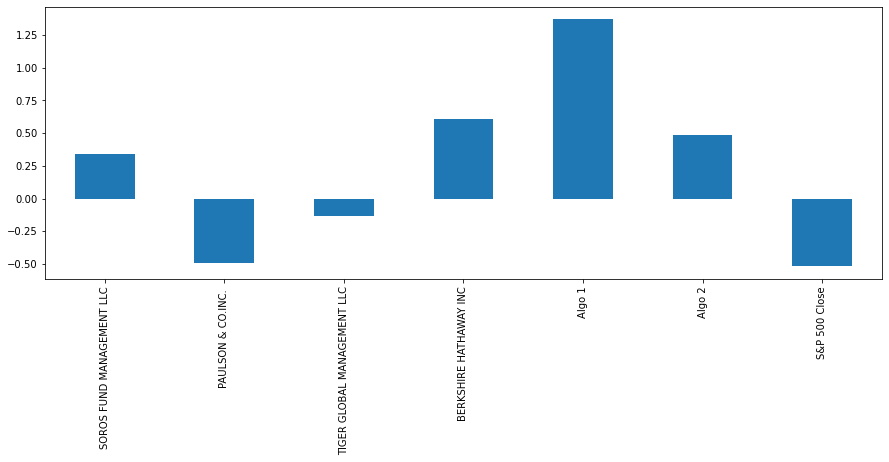

In [137]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot.bar(figsize = (15,5))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Both the algorithmic strategies have higher sharpe ratio's than any of the portfolios, and the market. Based on the the sharpe ratio, the algorithmic strategies have the best risk-adjusted-performance. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [138]:
# Reading data from 1st stock

aapl_returns = Path("aapl_historical.csv")
aapl_returns = pd.read_csv(aapl_returns, index_col="Trade DATE")
aapl_returns.index = pd.to_datetime(aapl_returns.index)
aapl_returns.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [139]:
# Reading data from 2nd stock

cost_returns = Path("cost_historical.csv")
cost_returns = pd.read_csv(cost_returns, index_col="Trade DATE")
cost_returns.index = pd.to_datetime(cost_returns.index)
cost_returns.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [140]:
# Reading data from 3rd stock

goog_returns = Path("goog_historical.csv")
goog_returns = pd.read_csv(goog_returns, index_col="Trade DATE")
goog_returns.index = pd.to_datetime(goog_returns.index)
goog_returns.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [141]:
# Combine all stocks in a single DataFrame

combined_stocks = pd.concat([aapl_returns, cost_returns, goog_returns], axis="columns", join="outer")
combined_stocks = combined_stocks.sort_index(ascending=True)
combined_stocks.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,AAPL,188.59,COST,195.76,GOOG,1098.26
2018-05-14,AAPL,188.15,COST,195.88,GOOG,1100.20
2018-05-15,AAPL,186.44,COST,195.48,GOOG,1079.23
2018-05-16,AAPL,188.18,COST,198.71,GOOG,1081.77
2018-05-17,AAPL,186.99,COST,199.60,GOOG,1078.59


In [142]:
# Reset Date index

combined_stocks.index = pd.to_datetime(combined_stocks.index)
combined_stocks.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,AAPL,188.59,COST,195.76,GOOG,1098.26
2018-05-14,AAPL,188.15,COST,195.88,GOOG,1100.20
2018-05-15,AAPL,186.44,COST,195.48,GOOG,1079.23
2018-05-16,AAPL,188.18,COST,198.71,GOOG,1081.77
2018-05-17,AAPL,186.99,COST,199.60,GOOG,1078.59


In [143]:
# Reorganize portfolio data by having a column per symbol

columns1 = ["Symbol", "AAPL", "Symbol", "COST","Symbol", "GOOG"]
combined_stocks.columns = columns1
combined_stocks = combined_stocks.drop(columns=["Symbol", "Symbol", "Symbol"])
combined_stocks.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [144]:
# Calculate daily returns

combined_stocks = combined_stocks.pct_change()

# Drop NAs

combined_stocks = combined_stocks.dropna()
combined_stocks.isnull().sum()

# Display sample data

combined_stocks.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [145]:
# Set weights

weight = 1/3

# Calculate portfolio return

combined_stocks_weighted = weight * combined_stocks["AAPL"] + weight * combined_stocks["COST"]+ weight * combined_stocks["GOOG"]


# Display sample data

combined_stocks_weighted.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [146]:
# Join your returns DataFrame to the original returns DataFrame

joined_df = pd.concat([whale_returns, combined_stocks_weighted], axis="columns", join="inner")
joined_df = joined_df.sort_index(ascending=True)
columns2 = ["SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC.", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC", "My Portfolio"]
joined_df.columns = columns2
joined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,My Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,-0.006061


In [147]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

joined_df = joined_df.dropna()
joined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,My Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,-0.006061


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [148]:
# Calculate the annualized `std`

annual_volatility2 = joined_df.std() * np.sqrt(252)
annual_volatility2

SOROS FUND MANAGEMENT LLC      0.145231
PAULSON & CO.INC.              0.115720
TIGER GLOBAL MANAGEMENT LLC    0.230321
BERKSHIRE HATHAWAY INC         0.244657
My Portfolio                   0.211428
dtype: float64

### Calculate and plot rolling `std` with 21-day window

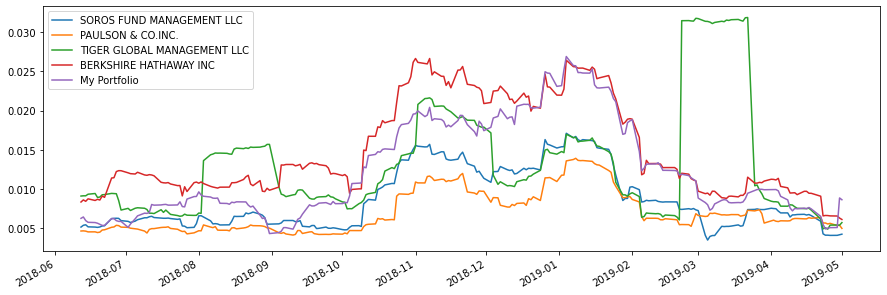

In [149]:
# Calculate rolling standard deviation

portfolios_rolling2 = joined_df.rolling(window=21).std()
portfolios_rolling2

# Plot rolling standard deviation

portfolios_rolling2 = joined_df.rolling(window=21).std().plot(figsize = (15,5))


### Calculate and plot the correlation

<AxesSubplot:>

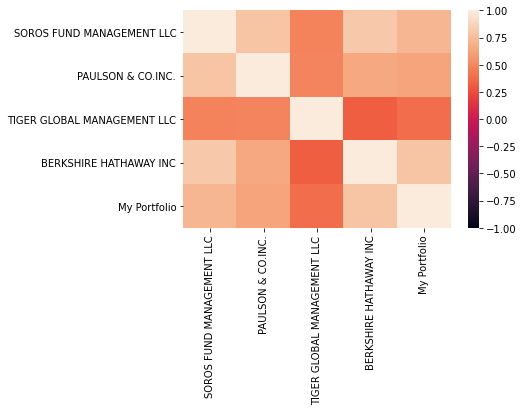

In [150]:
# Calculate and plot the correlation

correlation2 = joined_df.corr()
sns.heatmap(correlation2, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.213991
2019-04-16    0.150997
2019-04-17    0.144171
2019-04-18    0.144017
2019-04-22    0.185516
Length: 1042, dtype: float64


<AxesSubplot:title={'center':'My Portfolio'}>

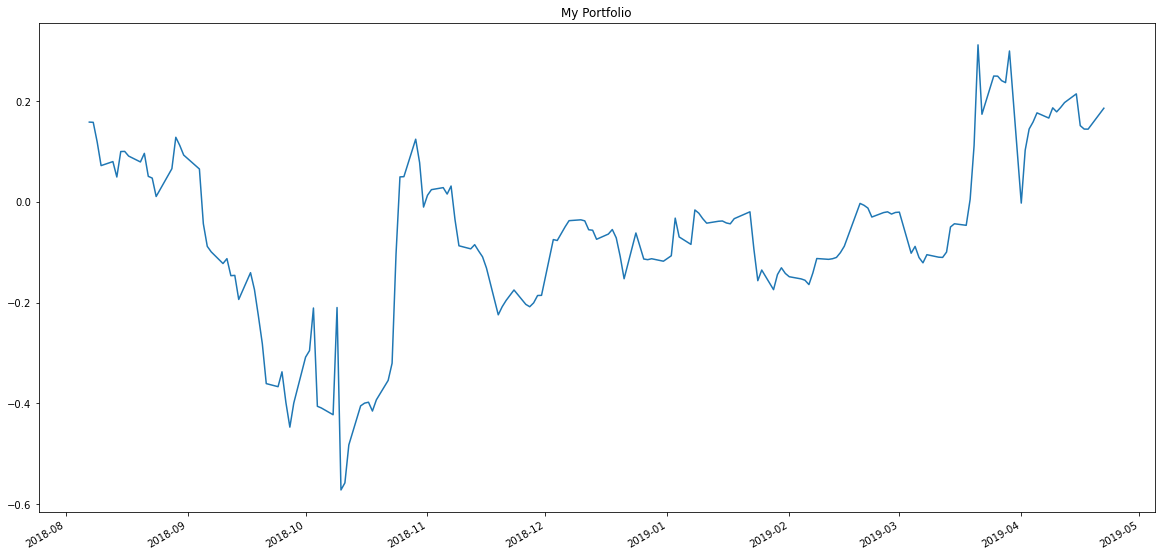

In [151]:
# Calculate and plot Beta

# Calculate covariance of a single portfolio

covariance2 = joined_df['My Portfolio'].cov(combined_df['S&P 500 Close'])
rolling_covariance2 = joined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df['S&P 500 Close'])

# Calculate variance of S&P 500

variance2 = combined_df['S&P 500 Close'].var()
rolling_variance = combined_df['S&P 500 Close'].rolling(window=60).var()

# Computing beta

rolling_beta2 = rolling_covariance2 / rolling_variance
print(rolling_beta)

# Plot beta trend

rolling_beta2.plot(figsize=(20, 10), title='My Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [152]:
# Calculate Annualzied Sharpe Ratios

sharpe_ratios2 = (joined_df.mean() * 252) / (joined_df.std() * np.sqrt(252))
sharpe_ratios2

SOROS FUND MANAGEMENT LLC      0.454684
PAULSON & CO.INC.              0.326660
TIGER GLOBAL MANAGEMENT LLC   -1.012700
BERKSHIRE HATHAWAY INC         0.168355
My Portfolio                   0.785940
dtype: float64

<AxesSubplot:>

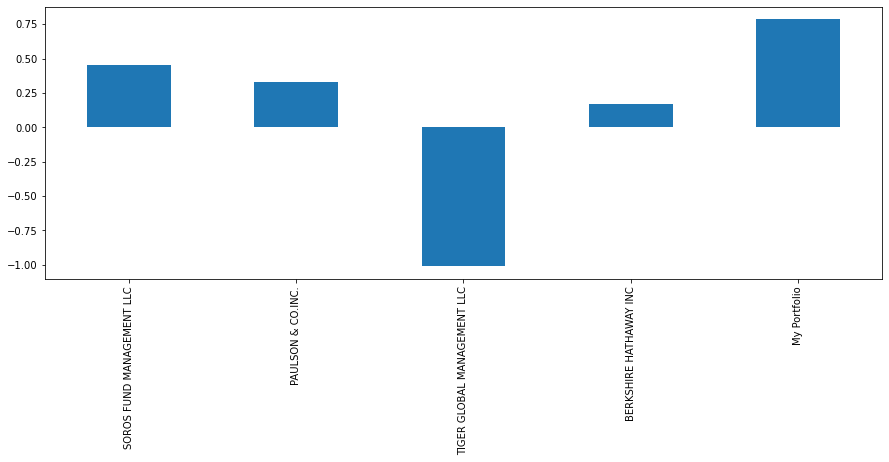

In [153]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios2.plot.bar(figsize = (15,5))

### How does your portfolio do?

Based on the results of the Sharpe Ratio, my portfolio is attratctive. It has the highest ratio among all of the portfolios, by far. 